# 统计序列长度及其分布

In [1]:
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取fasta文件
def read_fasta(fasta_path):
    records = list(SeqIO.parse(fasta_path, 'fasta'))
    return records

In [3]:
# 统计序列长度
def get_sequence_lengths(records):
    lengths = [len(record.seq) for record in records]
    lengths_df = pd.DataFrame(lengths, columns=['Length'])
    return lengths_df

In [4]:
fasta_file = '../data/16SrRNA.fasta'

# 读取序列
records = read_fasta(fasta_file)

# 获取长度统计
lengths_df = get_sequence_lengths(records)

# 显示基本统计信息
lengths_df.describe()

,Length
count,75969.000000
mean,1287.028077
std,444.487052
min,53.000000
25%,1252.000000
50%,1521.000000
75%,1542.000000
max,3845.000000


In [5]:
# 找出最长序列的名称
max_index = lengths_df['Length'].idxmax()
max_record = records[max_index]
print(f"Longest sequence ID: {max_record.id}")

Longest sequence ID: refseq162843


In [6]:
print(f"Longest sequence: {max_record.seq}")

Longest sequence: ATTAAAGAGAGTTTGATCCTGGCTCAGGACGAACGCTGGCGGCGTGCCTAATACATGCAAGTAGAACGCTGAGAACTGGTGCTTGCACCGGTTCAAGGAGTTGCGAACGGGTGAGTAACGCGTAGGTAACCTACCTCATAGCGGGGGATAACTATTGGAAACGATAGCTAATACCGCATAAGAGAGACTAACGCATGTTAGTAATTTAAAAGGGGCAATTGCTCCACTATGAGATGGACCTGCGTTGTATTAGCTAGTTGGTGAGGTAAAGGCTCACCAAGGCGACGATACATAGCCGACCTGAGAGGGTGATCGGCCACACTGGGACTGAGACACGGCCCAGACTCCTACGGGAGGCAGCAGTAGGGAATCTTCGGCAATGGGGGCAACCCTGACCGAGCAACGCCGCGTGAGTGAAGAAGGTTTTCGGATCGTAAAGCTCTGTTGTTAGAGAAGAATGATGGTGGGAGTGGAAAATCCACCAAGTGACGGTAACTAACCAGAAAGGGACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN

- 最长序列存在许多N，因此需要对含有非ATCG字符的序列过滤

In [12]:
# 假设 x 是你想要指定的长度阈值
x = 250  # 这里可以根据实际情况修改 x 的值
count = (lengths_df['Length'] < x).sum()
print(f"序列长度小于 {x} 的数量为: {count}")

序列长度小于 250 的数量为: 4474


- 细菌扩增子测序常见的V4区域一般在250bp，为了保证较高的准确性，去除长度小于250bp的序列

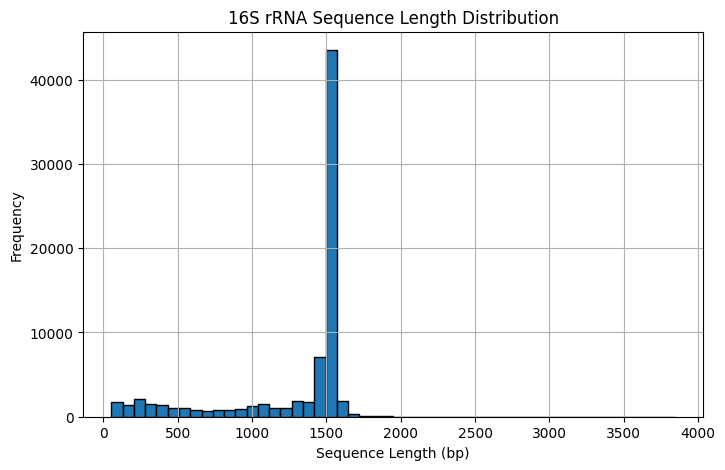

In [19]:
# 绘制序列长度分布直方图
plt.figure(figsize=(8,5))
plt.hist(lengths_df['Length'], bins=50, edgecolor='black')
plt.title('16S rRNA Sequence Length Distribution')
plt.xlabel('Sequence Length (bp)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()